In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.close('all')

# TP gradient stochastique  MDI341


## Exemple sur données synthétiques

#### Question 1

$\frac{dl}{dh} = h - y$

#### Question 2

$∇f_i(w) = x_i(w^Tx_i-y_i)$

#### Question 3 , 4 , 5 , 6

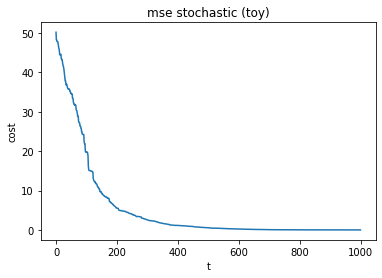

In [35]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

#### Question 7

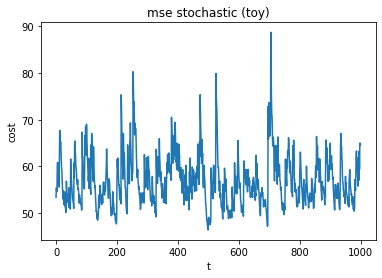

In [60]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=5, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

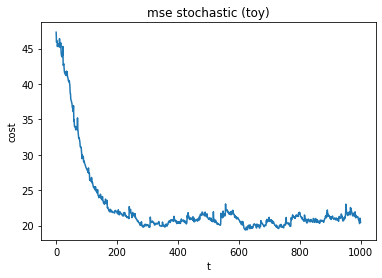

In [61]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=0.5, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

#### Question 8

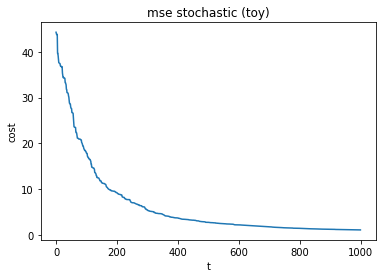

In [55]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

Le pas risque de decroitre trop rapidement en fonction des iterations pour le pas et donc de ne pas pouvoir le controler

## Exemple sur données réelles

#### Question 9

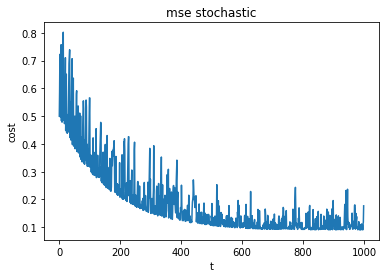

In [81]:
gamma = 0.01  # step size
n_iter = 1000  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)


plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()

#### Question 10

[-0.11399594  0.58108534 -0.9740847 ]


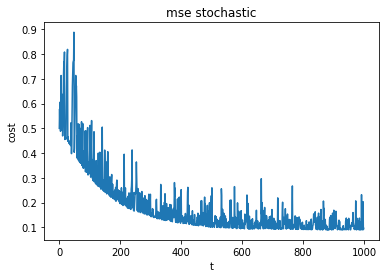

In [97]:
gamma = 0.01  # step size
n_iter = 1000  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss, alpha=0, average=True)


plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
print(w)
plt.show()

#### Question 11

[-0.09365691  0.5298828  -0.82876236]


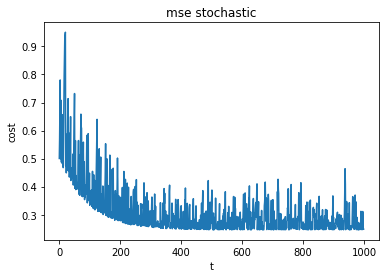

In [99]:
gamma = 0.01  # step size
n_iter = 1000  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss, alpha=0.2, average=False)


plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
print(w)
plt.show()

#### Question 12

[0.05999464 0.05999464 0.05999464]


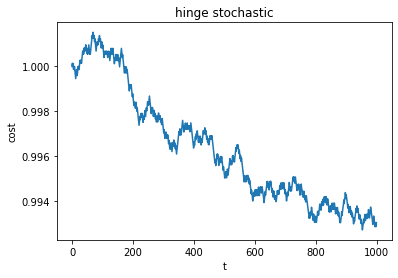

In [111]:
gamma = 0.001  # step size
n_iter = 1000  # number of iterations

#loss = 'mse'
loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss, alpha=0.2, average=False)


plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
print(w)
plt.show()

### Code à trou pour repondre aux questions :

In [57]:
###############################################################################
#            Toy dataset
###############################################################################

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.001  # suggested step size


# def gamma(t):
#     return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples) * 1e-5
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4

In [108]:
############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma
    
    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2) 
            gradient = X[idx] * ( np.dot(X[idx], w) - y[idx] ); # QUESTIONS 2 et 3
        elif loss == "hinge":
            pobj[t] = max(0, np.mean(1 - y * np.dot(X, w)))
            if (1 - y[idx] * np.dot(X[idx], w)) > 0:
                gradient = -y[idx]
            else :
                gradient = 0.0
            
        #w -= gamma_func(t) * gradient
        w -= gamma * gradient
        if average is True:
            if t == n_iter - 1 :
                moy1 = 0
                moy2 = 0
                moy3 = 0
                for k in range(t) :
                    moy1 += all_w[k, 0]
                    moy2 += all_w[k, 1]
                    moy3 += all_w[k, 2]
                moy1 /= t
                moy2 /= t
                moy3 /= t
                w[0] = moy1
                w[1] = moy2
                w[2] = moy3
                return w, all_w, pobj
        if alpha > 0:
            pobj[t] += alpha/2 * np.linalg.norm(w)**2
            gradient = alpha * w
            w -= gamma * gradient
        all_w[t] = w
    return w, all_w, pobj


w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=1, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

ValueError: shapes (1000,101) and (3,) not aligned: 101 (dim 1) != 3 (dim 0)

In [62]:
############################################################################
#            Loading and visualizing the data
############################################################################

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

# A function for vizualizing the data and classification given by w
def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()

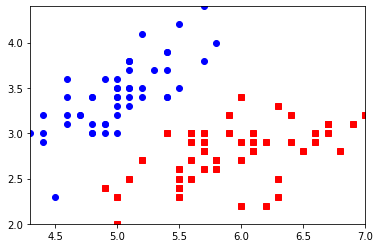

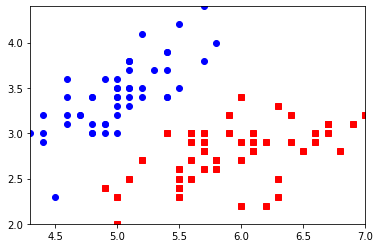

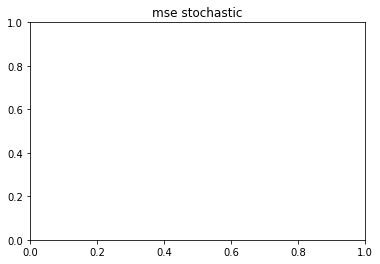

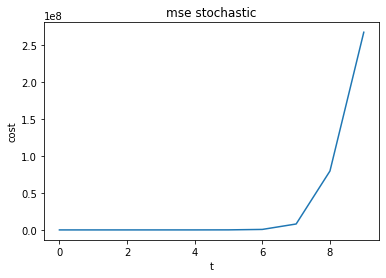

In [63]:
############################################################################
#            Displaying labeled data
############################################################################

plot_2d(X[:, :2], y)


# QUESTION 8
gamma = 0.1  # step size
n_iter = 10  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)

plot_2d(X, y, w)
plt.title('%s stochastic' % loss)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()

In [ ]:
############################################################################
#            Using Scikit-Learn
############################################################################

# QUESTION 13 : compare with SGDClassifier from Scikit-Learn
